In [65]:
# file = 'wgetthinkbroadband_hourGrouping.csv'
# file = 'datacollectorr_amazon_hourGrouping.csv'
file = 'curltxt_hourGrouping.csv'
# file = 'datacollectorr_hourGrouping.csv'
# file = 'Snowflake_dayGrouping.csv'
# file = 'threatsolver_snowflakecomputing.csv'
# file = 'javanet.lacework.threatresolver.Main_amazonawscom.csv'

time_series = []
with open('datasets_byhour/' + file) as f:
    ts_array = f.readlines()
for currentHour, x in enumerate(ts_array):
    time_series.append(float(x))
time_series_expected = []

np.max(time_series)

3.0

In [66]:
import math
import numpy as np

time_series_expected = []
decayFunction_values = []

class Algorithm():
    
    # Initialized with the Timeserie
    def __init__(self): 
        self.hyperparam = None
        self.reset()
        time_series_expected = []
        self.cumulativeValues = []
        self.previousExpected = 0

    # Polynomial regressions (polynomial least squares fittings).
    def decayFunction(self, TSLRE):
        return (-0.04448 * (TSLRE/24)) + 3.6 # Generalize better than order 2


    def secondDecayFunction(self, lastTick, value): 
        return abs(lastTick - value) 
    
    def reset(s):
        s.meanSinceLastRareEdge = 0
        s.stdSinceLastRareEdge = 0
        s.timeSinceLastRareEdge = 0
        s.expectedValue = 0
        
    currentHour = -1 #0 in first iteration
    trainingTime = 30 * 24
    
    # Cumulative values since Last Rare Edge
    lastMaxValue = 0
    lastMaxValuePosition = 0
    lastTick = 0 # Test
    lastReportedRareEdge = 0
    
    
    def feed(s, tick):
        
        s.cumulativeValues.append(tick)
        avg = np.mean(s.cumulativeValues[-24:])
        std = np.std(s.cumulativeValues[-200:])
        
        # Training first 30 days
        s.currentHour = s.currentHour + 1
        if s.currentHour < s.trainingTime:
            s.lastMaxValue = max(s.lastMaxValue, tick)
            time_series_expected.append(0) #UI
            return
        
        elif s.currentHour == s.trainingTime:
            
            s.lastMaxValue = max(s.lastMaxValue, tick)
            s.lastMaxValuePosition = s.trainingTime
            s.expectedValue =   (s.decayFunction(1) * s.lastMaxValue) ## working ?
            s.previousExpected =  s.expectedValue  
            time_series_expected.append(s.expectedValue) #UI
            return
      
        #Time Since Last Rare Edge
        TSLMV = s.currentHour - s.lastMaxValuePosition
        TSLRE =  s.currentHour - s.lastReportedRareEdge
        
        if tick > s.expectedValue:
            if (TSLRE > 24):
                print("Hour: ",s.currentHour," ----> Value: ", int(tick))
                lastReportedRareEdge = s.currentHour
             
        if (s.decayFunction(TSLMV) * s.lastMaxValue) < s.decayFunction(1) * tick:
            s.expectedValue = s.decayFunction(1) * tick
            s.expectedValue = s.expectedValue +  std
            s.lastMaxValuePosition = s.currentHour
            s.lastMaxValue = tick
        else:
            s.expectedValue = s.decayFunction(TSLMV) * s.lastMaxValue 
            s.expectedValue = s.expectedValue + std 
            
        time_series_expected.append(s.expectedValue)
            

In [67]:
algoInstance = Algorithm()
for entry in time_series:
    algoInstance.feed(entry)

/Users/anglecambero/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Plot of the number of connections between processes and dns by day')

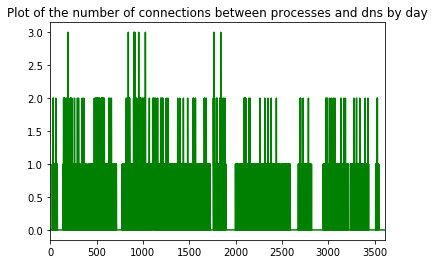

In [68]:
import seaborn as sns
import matplotlib.pyplot as plot
sns.tsplot(time_series, color="green")
plot.title("Plot of the number of connections between processes and dns by day") 

/Users/anglecambero/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, '----------------------------------')

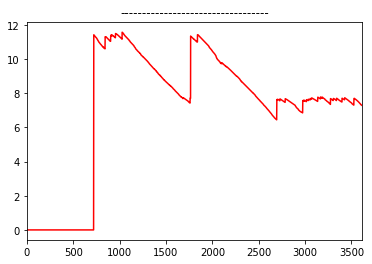

In [69]:
sns.tsplot(time_series_expected, color="red")
plot.title("----------------------------------") 

In [70]:
# sns.tsplot(decayFunction_values, color="blue")
# plot.title("----------------------------------") 